# salmonQuantWorkflow cost analysis
Data was cut and paste from the [Workflow Cost Estimator.ipynb](https://app.terra.bio/#workspaces/test-aedavids-proj/AnVIL_GTEx_V8_hg38_edu_ucsc_kim_lab/notebooks/launch/Workflow%20Cost%20Estimator.ipynb)
- salmonQuantWorkflow
- 328 panc samples
-  total_cost: $288.97
- submission_id = "b0aec0e9-ee90-4e01-a8ee-f622d89f2de6"

In [1]:
from   bme263DataVis.utilities import MatPlotLibUtilities
import matplotlib.pyplot as plt

mplu = MatPlotLibUtilities()
mplu.loadStyle() # load our custom matplotlib style settings

import numpy as np
import pandas as pd

# load and clean data

In [2]:
costFile = "../../data/terra/panc328Cost.tsv"
costDF = pd.read_csv(costFile, sep="\t", header=0)
costDF.head()

,workflow_id,task_name,cpus,memory,disk,duration,cost
0,73af3ef3-7829-4725-8077-a95975602847,bamToFastq,2,10GB,40GB,6.14h,$0.16
1,73af3ef3-7829-4725-8077-a95975602847,salmon_paired_reads,10,64GB,80GB,1.42h,$0.19
2,2ae184b7-5101-4f4d-9155-d315ae5d485e,bamToFastq,0,0GB,0GB,0.00h,$0.00
3,2ae184b7-5101-4f4d-9155-d315ae5d485e,salmon_paired_reads,10,64GB,80GB,25.76h,$3.46
4,f1ecad24-7f3b-4f47-8c87-51f466f77e3d,bamToFastq,2,10GB,40GB,35.91h,$0.92


In [3]:
costDF[ costDF.workflow_id == '3f179e45-5803-435e-86cf-4234b97b950c' ]

,workflow_id,task_name,cpus,memory,disk,duration,cost
534,3f179e45-5803-435e-86cf-4234b97b950c,bamToFastq,0,0GB,0GB,0.00h,$0.00
535,3f179e45-5803-435e-86cf-4234b97b950c,salmon_paired_reads,10,64GB,80GB,44.19h,$5.94


In [4]:
# convert cost values from string obj to float
costDF['cost'] = costDF['cost'].str.replace('$', '', regex=False).astype('float')

In [5]:
# convert durration from string obj to mins
costDF['duration'] = costDF['duration'].str.replace('h$', '', regex=True)
costDF['duration'] = costDF['duration'].str.split('.').apply(lambda x: int(x[0]) * 60 + int(x[1])).astype('int')

In [6]:
costDF.dtypes

workflow_id     object
task_name       object
cpus             int64
memory          object
disk            object
duration         int64
cost           float64
dtype: object

In [7]:
costDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   workflow_id  654 non-null    object 
 1   task_name    654 non-null    object 
 2   cpus         654 non-null    int64  
 3   memory       654 non-null    object 
 4   disk         654 non-null    object 
 5   duration     654 non-null    int64  
 6   cost         654 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 35.9+ KB


In [8]:
# remove row that have zero cpu, these did not run. could value was cached
badDFRows = costDF["cpus"] == 0
badDF = costDF.loc[badDFRows,:]
badDF.head()

,workflow_id,task_name,cpus,memory,disk,duration,cost
2,2ae184b7-5101-4f4d-9155-d315ae5d485e,bamToFastq,0,0GB,0GB,0,0.0
8,4cd9de90-3b18-446c-8f2a-594abb532835,bamToFastq,0,0GB,0GB,0,0.0
9,4cd9de90-3b18-446c-8f2a-594abb532835,salmon_paired_reads,0,0GB,0GB,0,0.0
55,beafa72a-f1ff-47e0-a129-279fd6b4bca6,bamToFastq,0,0GB,0GB,0,0.0
110,ceff9601-2d5f-4b4d-9847-cd057181084c,bamToFastq,0,0GB,0GB,0,0.0


In [9]:
goodDFRows = costDF["cpus"] != 0
costDF = costDF.loc[goodDFRows,:]
costDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 653
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   workflow_id  587 non-null    object 
 1   task_name    587 non-null    object 
 2   cpus         587 non-null    int64  
 3   memory       587 non-null    object 
 4   disk         587 non-null    object 
 5   duration     587 non-null    int64  
 6   cost         587 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 36.7+ KB


# explore bamToFastq task cost

In [10]:
bamTaskRows = costDF["task_name"] == 'bamToFastq'
bamTaskDF = costDF.loc[bamTaskRows,:]
bamTaskDF.head()

,workflow_id,task_name,cpus,memory,disk,duration,cost
0,73af3ef3-7829-4725-8077-a95975602847,bamToFastq,2,10GB,40GB,374,0.16
4,f1ecad24-7f3b-4f47-8c87-51f466f77e3d,bamToFastq,2,10GB,40GB,2191,0.92
6,a79255e1-5de6-4b37-b77d-5d9df89a12ee,bamToFastq,2,10GB,40GB,2021,0.85
10,0f779143-46cb-471d-9422-38309a723a74,bamToFastq,2,10GB,40GB,1736,0.73
11,78af70c5-c64f-4cc1-ba8b-c623cdc43435,bamToFastq,2,10GB,40GB,2041,0.86


In [11]:
bamTaskDF.describe()

,cpus,duration,cost
count,306.0,306.000000,306.00000
mean,2.0,1164.388889,0.48732
std,0.0,753.169053,0.32135
min,2.0,29.000000,0.01000
25%,2.0,486.250000,0.19250
50%,2.0,1174.500000,0.49000
75%,2.0,1817.750000,0.77000
max,2.0,2463.000000,1.04000


# explore salmon_paired_reads task

In [12]:
salmonTaskRows = costDF["task_name"] == 'salmon_paired_reads'
salmonTaskDF = costDF.loc[salmonTaskRows,:]
salmonTaskDF.head()

,workflow_id,task_name,cpus,memory,disk,duration,cost
1,73af3ef3-7829-4725-8077-a95975602847,salmon_paired_reads,10,64GB,80GB,102,0.19
3,2ae184b7-5101-4f4d-9155-d315ae5d485e,salmon_paired_reads,10,64GB,80GB,1576,3.46
5,f1ecad24-7f3b-4f47-8c87-51f466f77e3d,salmon_paired_reads,10,64GB,80GB,196,0.42
7,a79255e1-5de6-4b37-b77d-5d9df89a12ee,salmon_paired_reads,10,64GB,80GB,751,1.60
12,78af70c5-c64f-4cc1-ba8b-c623cdc43435,salmon_paired_reads,10,64GB,80GB,532,1.14


In [13]:
salmonTaskDF.describe()

,cpus,duration,cost
count,281.0,281.000000,281.000000
mean,10.0,243.725979,0.497616
std,0.0,320.662840,0.716840
min,10.0,50.000000,0.070000
25%,10.0,84.000000,0.130000
50%,10.0,128.000000,0.230000
75%,10.0,277.000000,0.590000
max,10.0,2659.000000,5.940000


# plot

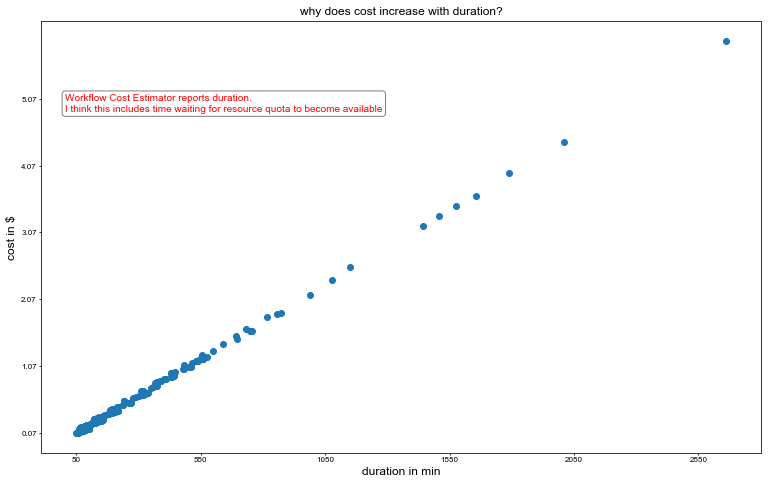

In [14]:
widthInInches  = 10
heightInInches = 6
fig = plt.figure(figsize=(widthInInches, heightInInches))
panel = mplu.createPanelSameSizeAsFig(fig)

x = salmonTaskDF['duration']
xmin = np.min(x)
xmax = np.max(x)
panel.set_xticks( np.arange(xmin, xmax, 500) )

y = salmonTaskDF['cost']
ymin = np.min(y)
ymax = np.max(y)

panel.scatter(x, y)
panel.set_xlabel("duration in min", fontsize=12)
panel.set_ylabel("cost in $", fontsize=12)
panel.set_yticks( np.arange(ymin, ymax, 1) )

panel.set_title("why does cost increase with duration?", fontsize=12)

txt = "Workflow Cost Estimator reports duration."
txt = txt + "\nI think this includes time waiting for resource quota to become available"
props = dict(boxstyle='round', facecolor="white", alpha=0.5)
panel.text( 5, 5, txt, fontsize=10, 
           horizontalalignment='left', verticalalignment='center',
           bbox=props, color="red" )

outfile="img/salmonQuantWorkFlowCostVsDuration.png"
fig.savefig(outfile, dpi=300, bbox_inches='tight')  # BME163 style sheet should set dpi=600

# ???
turns out max cost was able to use a cache result. I discovered this selecting the submission id and then searching  for the workflow_id. <span style="color:red">it looks like either we pay for time spent in the queue or the workflow cost estimator does not work well for large jobs that execeed resource quota.</span>

## TODO
check daily spend on google cloude console for actual value

In [15]:
print("max cost in $: {}".format(np.max(y)))
print("max duration in min.: {}".format(np.max(x)))
salmonTaskDF[ salmonTaskDF.cost == 5.940000 ]

max cost in $: 5.94
max duration in min.: 2659


,workflow_id,task_name,cpus,memory,disk,duration,cost
535,3f179e45-5803-435e-86cf-4234b97b950c,salmon_paired_reads,10,64GB,80GB,2659,5.94


In [16]:
costDF[ costDF.workflow_id == '3f179e45-5803-435e-86cf-4234b97b950c' ]

,workflow_id,task_name,cpus,memory,disk,duration,cost
535,3f179e45-5803-435e-86cf-4234b97b950c,salmon_paired_reads,10,64GB,80GB,2659,5.94
